In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [ ]:
df = pd.read_csv(r'/content/Stunting_Dataset-mater.csv')

In [ ]:
df.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,Male,17,3.0,49,10.0,72.2,No,No
1,Female,11,2.9,49,2.9,65.0,No,Yes
2,Male,16,2.9,49,8.5,72.2,No,Yes
3,Male,31,2.8,49,6.4,63.0,No,Yes
4,Male,15,3.1,49,10.5,49.0,No,Yes


In [ ]:
df.describe()

,Age,Birth Weight,Birth Length,Body Weight,Body Length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,14.255000,2.757600,49.117400,7.631990,68.85492
std,7.923285,0.291092,0.439814,1.720461,8.90664
min,6.000000,2.000000,48.000000,2.900000,49.00000
25%,10.000000,2.800000,49.000000,6.400000,65.00000
50%,13.000000,2.800000,49.000000,7.700000,68.30000
75%,15.000000,2.900000,49.000000,9.000000,72.20000
max,48.000000,3.100000,50.000000,10.500000,92.70000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         10000 non-null  object 
 1   Age            10000 non-null  int64  
 2   Birth Weight   10000 non-null  float64
 3   Birth Length   10000 non-null  int64  
 4   Body Weight    10000 non-null  float64
 5   Body Length    10000 non-null  float64
 6   Breastfeeding  10000 non-null  object 
 7   Stunting       10000 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [ ]:
df.columns

Index(['Gender', 'Age', 'Birth Weight', 'Birth Length', 'Body Weight',
       'Body Length', 'Breastfeeding', 'Stunting'],
      dtype='object')

In [ ]:
df = df.drop(columns=['Breastfeeding'])

In [ ]:
df = df.rename(columns={
    'Gender': 'Jenis Kelamin',
    'Age': 'Umur',
    'Birth Weight': 'Berat Lahir',
    'Birth Length': 'Tinggi Lahir',
    'Body Weight' : 'Berat Badan',
    'Body Length' : 'Tinggi Badan',
    'Stunting' : 'Status Stunting',
})

In [ ]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].replace({
    'Female': 'Perempuan',
    'Male': 'Laki-Laki'
})

df['Status Stunting'] = df['Status Stunting'].replace({
    'No': 'Tidak Stunting',
    'Yes': 'Stunting'
})

In [ ]:
df.head()

,Jenis Kelamin,Umur,Berat Lahir,Tinggi Lahir,Berat Badan,Tinggi Badan,Status Stunting
0,Laki-Laki,17,3.0,49,10.0,72.2,Tidak Stunting
1,Perempuan,11,2.9,49,2.9,65.0,Stunting
2,Laki-Laki,16,2.9,49,8.5,72.2,Stunting
3,Laki-Laki,31,2.8,49,6.4,63.0,Stunting
4,Laki-Laki,15,3.1,49,10.5,49.0,Stunting


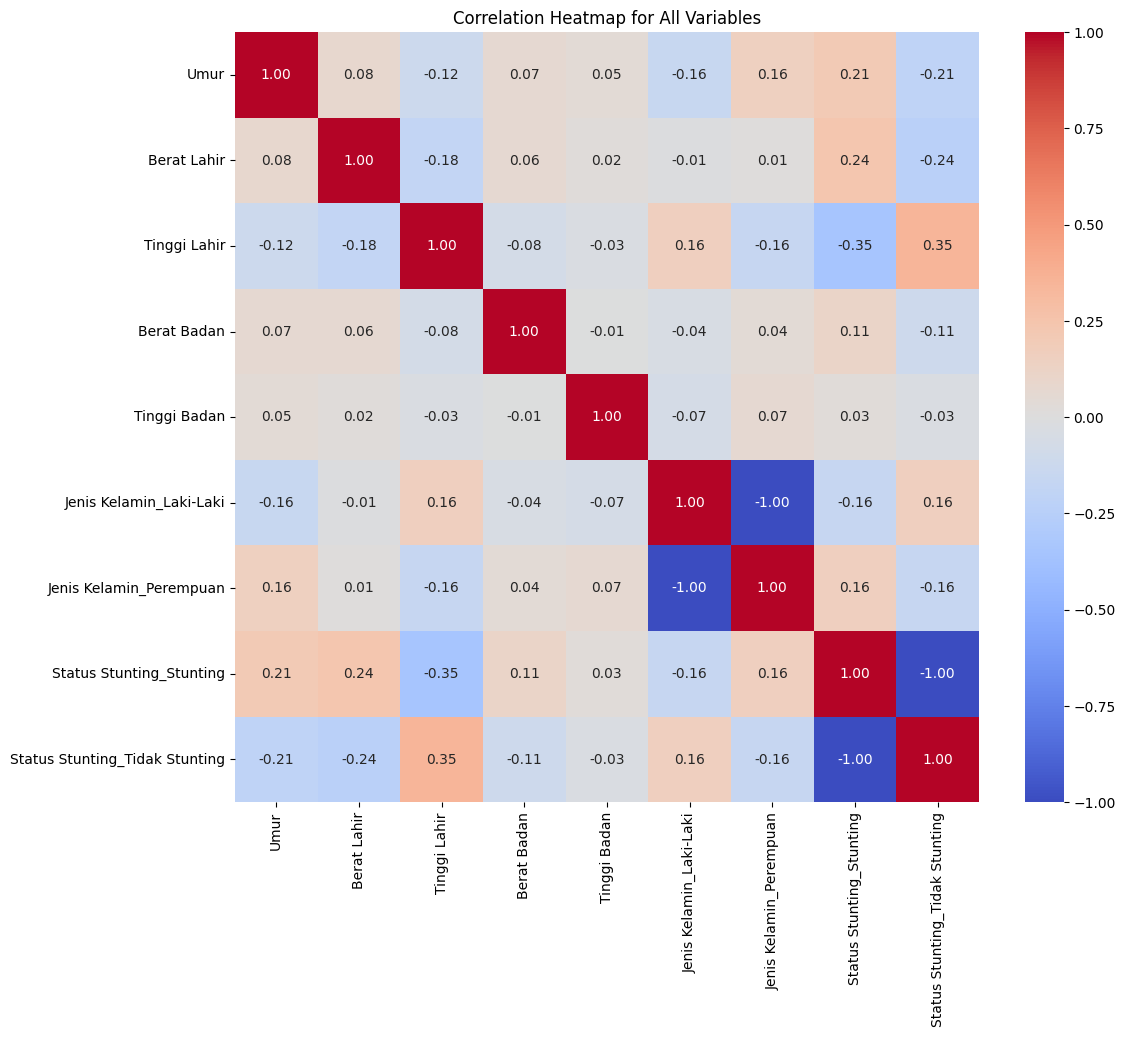

In [ ]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df.select_dtypes(include=['object']))

# Concatenate numerical and encoded categorical variables
df_combined = pd.concat([df_numerical, df_encoded], axis=1)

# Create a heatmap for all variables
correlation_matrix_combined = df_combined.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_combined, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for All Variables')
plt.show()

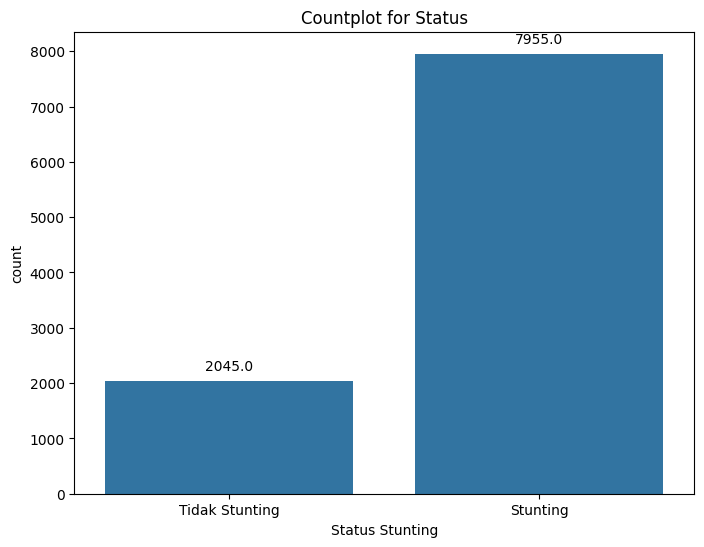

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Status Stunting', data=df)

# Add count annotations on the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Countplot for Status')
plt.show()

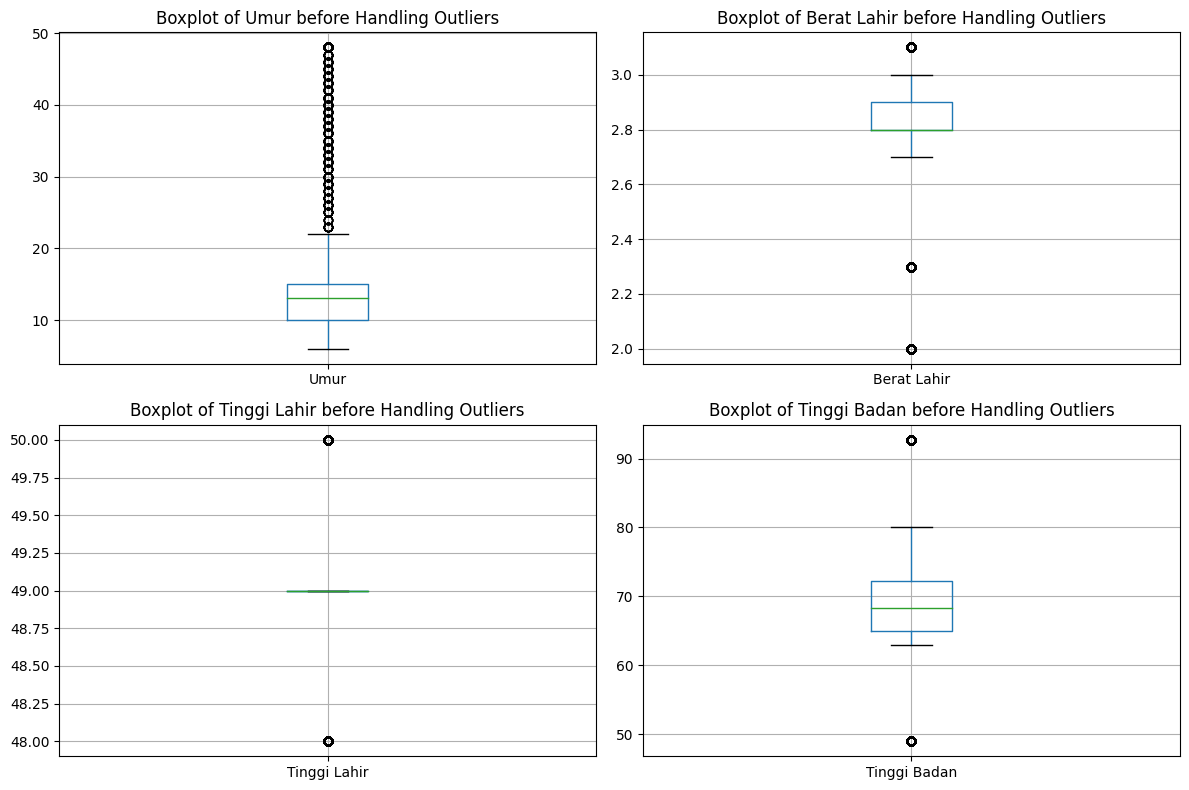

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
df.boxplot(column=['Umur'])
plt.title('Boxplot of Umur before Handling Outliers')

plt.subplot(2, 2, 2)
df.boxplot(column=['Berat Lahir'])
plt.title('Boxplot of Berat Lahir before Handling Outliers')

plt.subplot(2, 2, 3)
df.boxplot(column=['Tinggi Lahir'])
plt.title('Boxplot of Tinggi Lahir before Handling Outliers')

plt.subplot(2, 2, 4)
df.boxplot(column=['Tinggi Badan'])
plt.title('Boxplot of Tinggi Badan before Handling Outliers')

plt.tight_layout()
plt.show()

In [ ]:
# Fungsi untuk mendeteksi dan menangani outlier menggunakan metode IQR
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

In [ ]:
# Menangani outlier untuk fitur yang relevan
for column in ['Umur', 'Berat Lahir', 'Tinggi Badan']:
    df = handle_outliers(df, column)

In [ ]:
# Fungsi untuk mendeteksi dan menangani outlier menggunakan metode mean
def handle_outliers_mean(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, df[column].mean(), df[column])
    df[column] = np.where(df[column] > upper_bound, df[column].mean(), df[column])
    return df

In [ ]:
df = handle_outliers_mean(df, 'Tinggi Lahir')

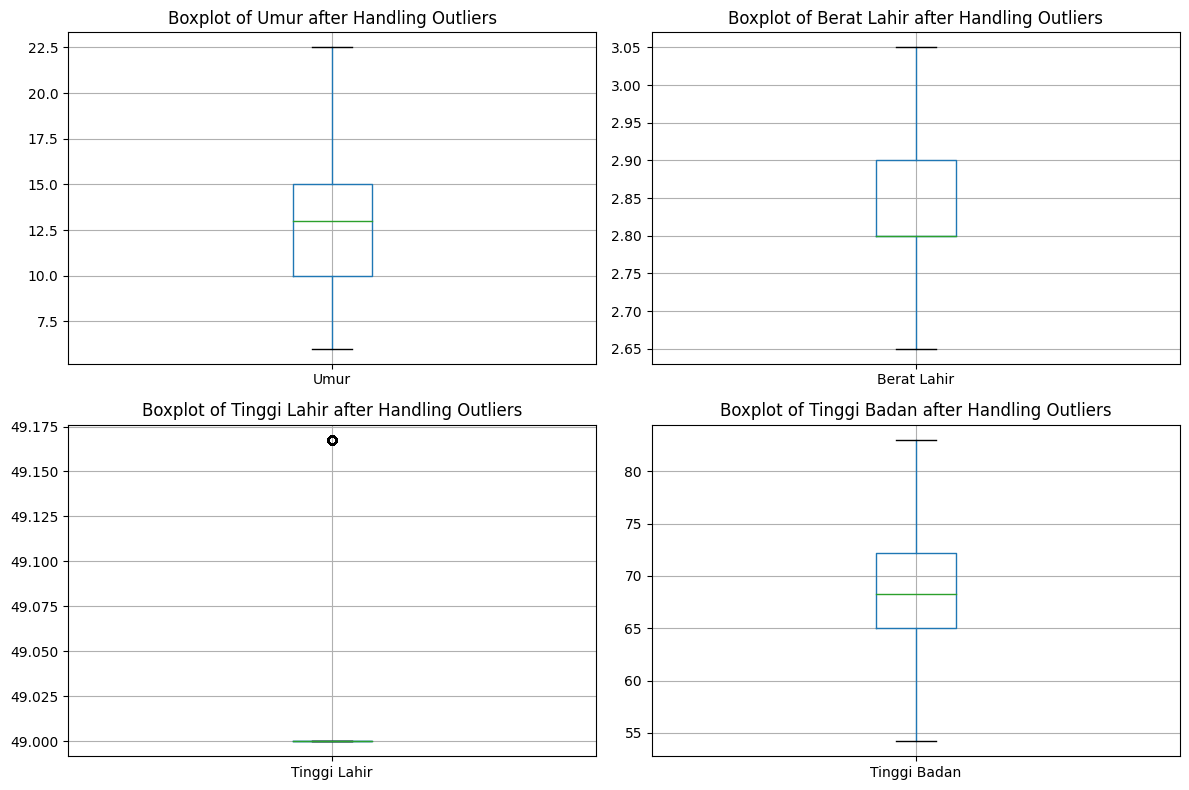

In [ ]:
# Menampilkan boxplot setelah penanganan outlier
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
df.boxplot(column=['Umur'])
plt.title('Boxplot of Umur after Handling Outliers')

plt.subplot(2, 2, 2)
df.boxplot(column=['Berat Lahir'])
plt.title('Boxplot of Berat Lahir after Handling Outliers')

plt.subplot(2, 2, 3)
df.boxplot(column=['Tinggi Lahir'])
plt.title('Boxplot of Tinggi Lahir after Handling Outliers')

plt.subplot(2, 2, 4)
df.boxplot(column=['Tinggi Badan'])
plt.title('Boxplot of Tinggi Badan after Handling Outliers')

plt.tight_layout()
plt.show()

In [ ]:
category_counts = df['Status Stunting'].value_counts()
category_counts

Status Stunting
Stunting          7955
Tidak Stunting    2045
Name: count, dtype: int64

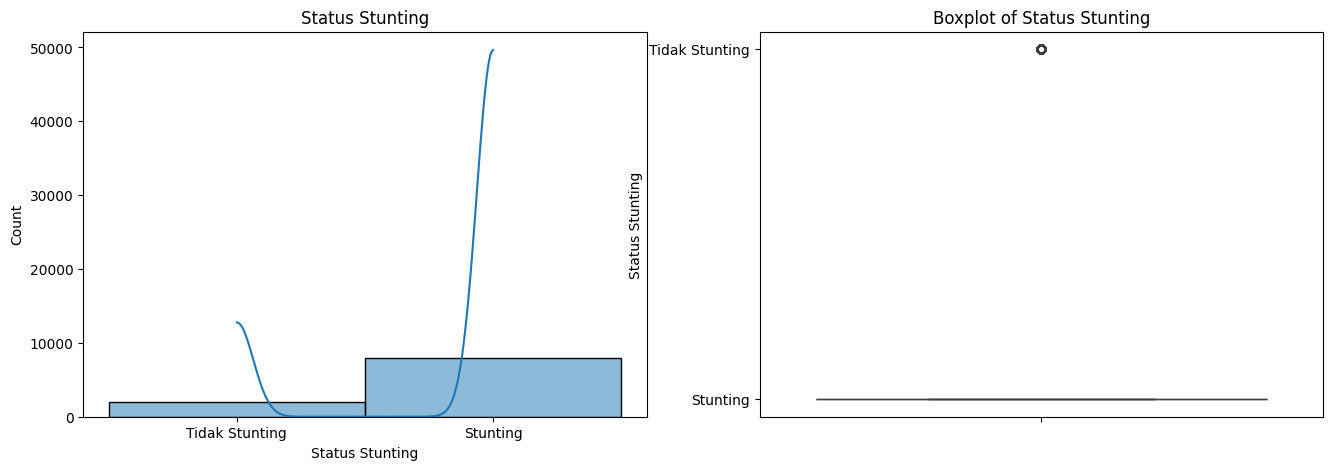

In [ ]:
# Check the distribution of "Observation_Value" with a distplot and boxplot using seaborn and matplotlib
plt.figure(figsize=(16, 5))

# Distribution plot
plt.subplot(121)
sns.histplot(df['Status Stunting'], kde=True)
plt.title('Status Stunting')

# Box plot
plt.subplot(122)
sns.boxplot(y=df['Status Stunting'])
plt.title('Boxplot of Status Stunting')

plt.show()

In [ ]:
# mengkodekan jenis kelamin
df['Jenis Kelamin'] = df['Jenis Kelamin'].map({'Laki-Laki': 0, 'Perempuan': 1})

# mengkodekan status gizi
df['Status Stunting'] = df['Status Stunting'].map({'Tidak Stunting': 0, 'Stunting': 1})
df

,Jenis Kelamin,Umur,Berat Lahir,Tinggi Lahir,Berat Badan,Tinggi Badan,Status Stunting
0,0,17.0,3.00,49.000000,10.0,72.2,0
1,1,11.0,2.90,49.000000,2.9,65.0,1
2,0,16.0,2.90,49.000000,8.5,72.2,1
3,0,22.5,2.80,49.000000,6.4,63.0,1
4,0,15.0,3.05,49.000000,10.5,54.2,1
...,...,...,...,...,...,...,...
9995,0,15.0,3.00,49.000000,9.0,63.0,1
9996,1,12.0,2.80,49.167571,7.7,63.0,0
9997,0,16.0,2.80,49.000000,7.7,54.2,0
9998,0,14.0,2.80,49.000000,10.0,69.0,1


In [ ]:
# memisahkan fitur dan target
X = df.drop('Status Stunting', axis=1)
y = df['Status Stunting']

# membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define the improved neural network model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Melatih model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
250/250 [==============================] - 3s 5ms/step - loss: 0.6551 - accuracy: 0.6819 - val_loss: 0.4224 - val_accuracy: 0.8470
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4980 - accuracy: 0.7920 - val_loss: 0.3968 - val_accuracy: 0.8425
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4533 - accuracy: 0.8176 - val_loss: 0.3886 - val_accuracy: 0.8410
Epoch 4/100
250/250 [==============================] - 1s 6ms/step - loss: 0.4378 - accuracy: 0.8241 - val_loss: 0.3845 - val_accuracy: 0.8450
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4344 - accuracy: 0.8264 - val_loss: 0.3845 - val_accuracy: 0.8450
Epoch 6/100
250/250 [==============================] - 2s 6ms/step - loss: 0.4225 - accuracy: 0.8309 - val_loss: 0.3824 - val_accuracy: 0.8435
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4141 - accuracy: 0.8334 - val_loss: 0.3814 - val_accuracy: 0.8445

In [ ]:
# Mengevaluasi model
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Train Loss: {train_loss}, Train Accuracy: {train_accuracy}')
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

63/63 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.8530
Train Loss: 0.3635115623474121, Train Accuracy: 0.8531249761581421
Test Loss: 0.3714226484298706, Test Accuracy: 0.8529999852180481


In [ ]:
# test predict model
test = pd.DataFrame({'Jenis Kelamin': [0], 'Umur': [15], 'Berat Lahir': [3.1], 'Tinggi Lahir': [49], 'Berat Badan': [10.5], 'Tinggi Badan': [49]})

pred = model.predict(test)
print("Predicted Score = {}".format(np.array(pred)))

1/1 [==============================] - 0s 23ms/step
Predicted Score = [[0.01583366]]


In [ ]:
# Prediksi dengan data test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Konversi prediksi probabilitas menjadi kelas biner

print('Predictions:', y_pred.flatten())

63/63 [==============================] - 0s 2ms/step
Predictions: [1 1 1 ... 1 0 1]


In [ ]:
# Menampilkan hasil prediksi dan nilai aktual
for actual, predicted in zip(y_test, y_pred):
    print(f'Actual: {actual}, Predicted: {predicted[0]}')

Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predi

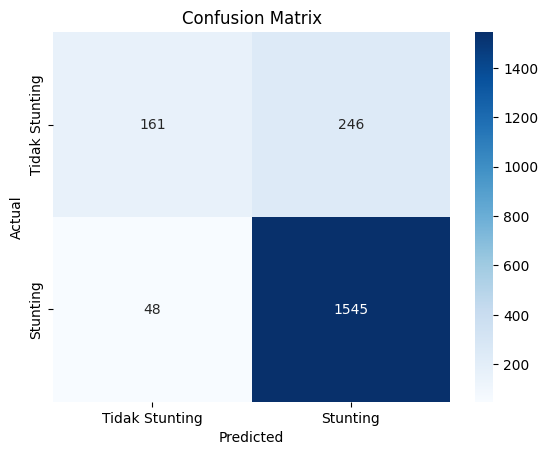

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Stunting', 'Stunting'], yticklabels=['Tidak Stunting', 'Stunting'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

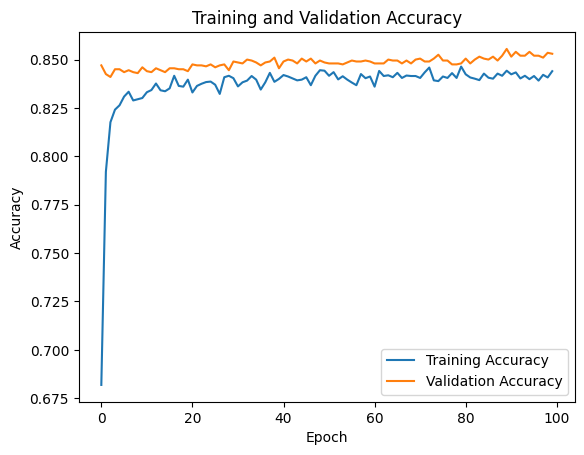

In [ ]:
# Plot akurasi selama pelatihan dan validasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

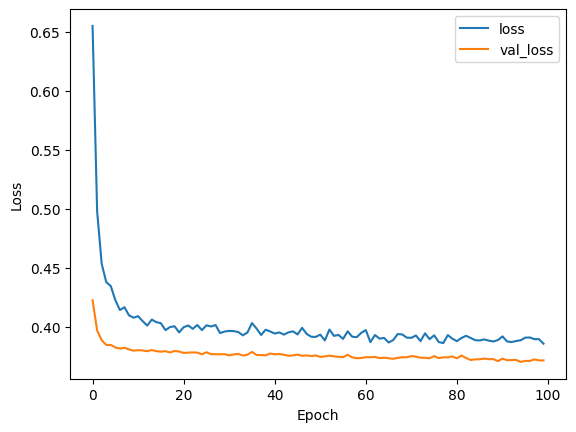

In [ ]:
# Plot akurasi selama loss dan val los
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# # Convert the model
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# # Save the model
# with open('model.tflite', 'wb') as f:
#     f.write(tflite_model)

In [ ]:
# from google.colab import files

# # Download the model
# files.download('model.tflite')